Имеется симметричный интегральный оператор Фредгольма $A: L^2 (a;b) \rightarrow L^2(a;b)$ с ядром $K(t,s)$.

A. Построить систему собственных чисел и собственных функций оператора A.

B. Найти решение уравнения $A[x] - \lambda x = y$ в виде ряда Фурье по собственным функциям оператора A. Проиллюстрировать решение графически.

$$
12. \ K(t,s) = 
\begin{cases}
   cos (t) sin (s), & 0 \leq s \leq t\\
   cos (s) sin (t), & t < s \leq \frac{\pi}{2}
 \end{cases}
, \ \lambda = \frac{1}{5}, \ y = \sqrt{\pi - 2t}
$$

### B) Решение:

Уравнение $A[x] - \lambda x = y$ при $\lambda = \frac{1}{5}, \ y = \sqrt{\pi - 2t}$ имеет вид:

$$
cos(t) \int_{0}^{t} sin(s) x(s) ds + sin(t) \int_{t}^{\frac{\pi}{2}} cos(s) x(s) ds
$$

Значения $e_k, \lambda_k$, полученные в пункте А:

$$
e_k = \frac{2}{\sqrt{\pi}} sin (2kt), k = 0,1,2...\\
\lambda_k = \frac{1}{4k^2 - 1}, k = 0,1,2...
$$

Значение $\lambda = \frac{1}{5}$ не является собственным числом оператора А, поэтому оператор $A - \lambda I$ обратим.

С помощью формул вычисляем коэффициенты Фурье

$$
    d_k = (y,e_k)\\
    c_k = \frac{d_k}{\lambda_k - \lambda}
$$

Находим частичную сумму ряда Фурье

$$
x = \sum_{k=0}^{\infty} c_k e_k
$$

In [1]:
import math as mat
import numpy as np
from sympy import *
init_printing()

d_k = 0
c_k = 0
e_k, l_k = symbols('e_k l_k')
y,x = symbols('y x')
t = symbols('t')

x = 0
l = 1/5
y = sqrt(pi - 2*t)

for k in range(0, 11):
    d_k = abs(integrate(y*((2/sqrt(pi))*sin(2*k*t)),(t,0,(pi/2))).n())
    c_k = d_k / ((1/(4*k**2 - 1)) - l)
    x = simplify(x).n() + c_k*((2/sqrt(pi))*sin(2*k*t))
x = simplify(x).n()

Получаем уравнение частичной суммы ряда Фурье k-го порядка

In [2]:
x

Построим график частичной суммы ряда Фурье максимально возможного порядка относительно небольшого времени компиляции программы, например, $S_{10}$

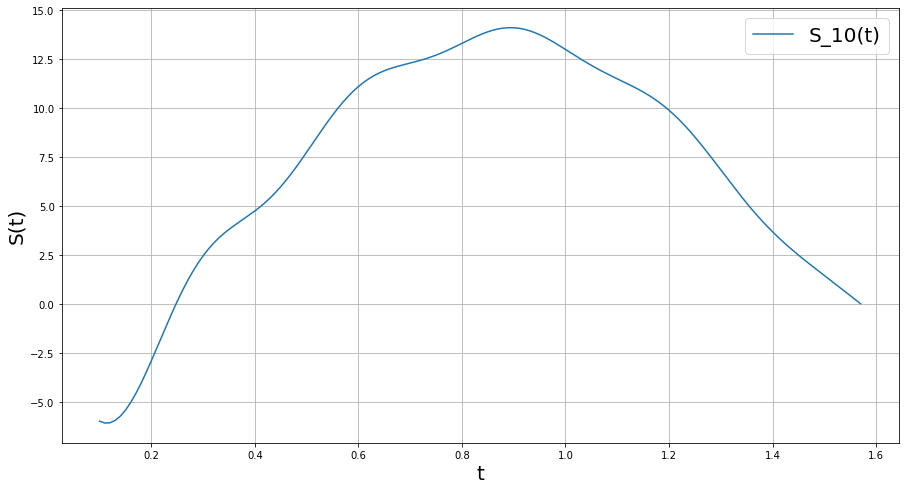

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Ox = np.arange(0.1, pi/2, 0.01)

Oy1 = [x.subs(t, val) for val in Ox]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('S(t)', fontsize = 20)
plt.plot(Ox, Oy1)
plt.legend(['S_10(t)'], fontsize = 20)
plt.grid()
plt.show()

Изобразим также графики функций $A[S_{10}] - \lambda S_{10}$ (пунктиром) и $y=\sqrt{\pi - 2t}$.

In [4]:
f,s = symbols('f s')
i1, i2 = symbols('i1 i2')
i1 = integrate(sin(s)*x.subs(t,s),(s,0,t))
i2 = integrate(cos(s)*x.subs(t,s),(s,t,pi/2))

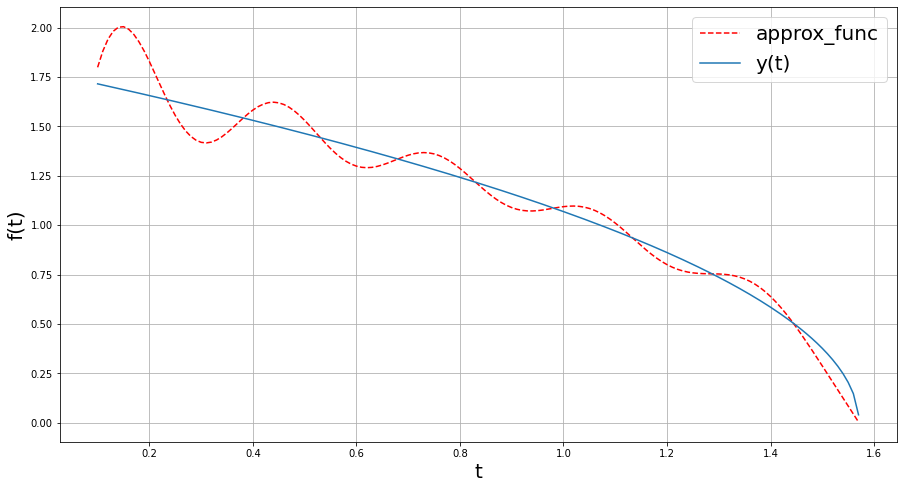

In [5]:
f = cos(t)*i1 + sin(t)*i2 - l*x
f = simplify(f)

Oy2 = [f.subs(t, val) for val in Ox]
Oy3 = [y.subs(t, val) for val in Ox]

plt.figure(figsize=(15,8))
plt.xlabel('t', fontsize = 20)
plt.ylabel('f(t)', fontsize = 20)
plt.plot(Ox, Oy2,'r--', Ox, Oy3)
plt.legend(['approx_func', 'y(t)'], fontsize = 20)
plt.grid()
plt.show()

Таким образом, из-за долгой компиляции кода была взята частичная сумма ряда Фурье 10-го порядка, но при этом по графикам можно наблюдать тенденцию сходимости.